In [2]:
import pandas as pd
# Load the dataset
df = pd.read_csv("bank.csv", sep=";")  # The dataset uses semicolon (;) as a delimiter
# Display the first few rows
print(df.head())

   age          job  marital  education default  balance housing loan  \
0   30   unemployed  married    primary      no     1787      no   no   
1   33     services  married  secondary      no     4789     yes  yes   
2   35   management   single   tertiary      no     1350     yes   no   
3   30   management  married   tertiary      no     1476     yes  yes   
4   59  blue-collar  married  secondary      no        0     yes   no   

    contact  day month  duration  campaign  pdays  previous poutcome   y  
0  cellular   19   oct        79         1     -1         0  unknown  no  
1  cellular   11   may       220         1    339         4  failure  no  
2  cellular   16   apr       185         1    330         1  failure  no  
3   unknown    3   jun       199         4     -1         0  unknown  no  
4   unknown    5   may       226         1     -1         0  unknown  no  


In [5]:
from sklearn.preprocessing import LabelEncoder
# Convert categorical columns to numerical using LabelEncoder
categorical_cols = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome', 'y']
label_encoders = {}
for col in categorical_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le  # Store encoders for inverse transformation if needed
print(df.head())


   age  job  marital  education  default  balance  housing  loan  contact  \
0   30   10        1          0        0     1787        0     0        0   
1   33    7        1          1        0     4789        1     1        0   
2   35    4        2          2        0     1350        1     0        0   
3   30    4        1          2        0     1476        1     1        2   
4   59    1        1          1        0        0        1     0        2   

   day  month  duration  campaign  pdays  previous  poutcome  y  
0   19     10        79         1     -1         0         3  0  
1   11      8       220         1    339         4         0  0  
2   16      0       185         1    330         1         0  0  
3    3      6       199         4     -1         0         3  0  
4    5      8       226         1     -1         0         3  0  


In [7]:
from sklearn.model_selection import train_test_split
# Define features and target variable
X = df.drop(columns=['y'])  # Features
y = df['y']  # Target variable (purchase decision)
# Split dataset into 80% training and 20% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(f"Training data size: {X_train.shape}")
print(f"Testing data size: {X_test.shape}")



Training data size: (3616, 16)
Testing data size: (905, 16)


In [8]:
from sklearn.tree import DecisionTreeClassifier
# Initialize and train the Decision Tree model
clf = DecisionTreeClassifier(max_depth=5, random_state=42)
clf.fit(X_train, y_train)
# Make predictions
y_pred = clf.predict(X_test)


Decision Tree Accuracy: 0.90
Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.97      0.94       807
           1       0.55      0.33      0.41        98

    accuracy                           0.90       905
   macro avg       0.74      0.65      0.68       905
weighted avg       0.88      0.90      0.89       905



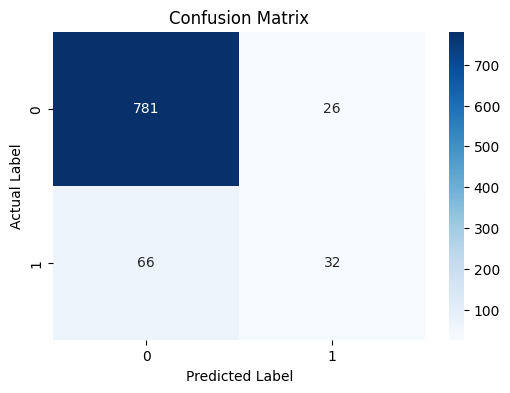

In [9]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
# Compute accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Decision Tree Accuracy: {accuracy:.2f}")
# Print classification report
print("Classification Report:\n", classification_report(y_test, y_pred))
# Display confusion matrix
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(6,4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap="Blues")
plt.xlabel("Predicted Label")
plt.ylabel("Actual Label")
plt.title("Confusion Matrix")
plt.show()

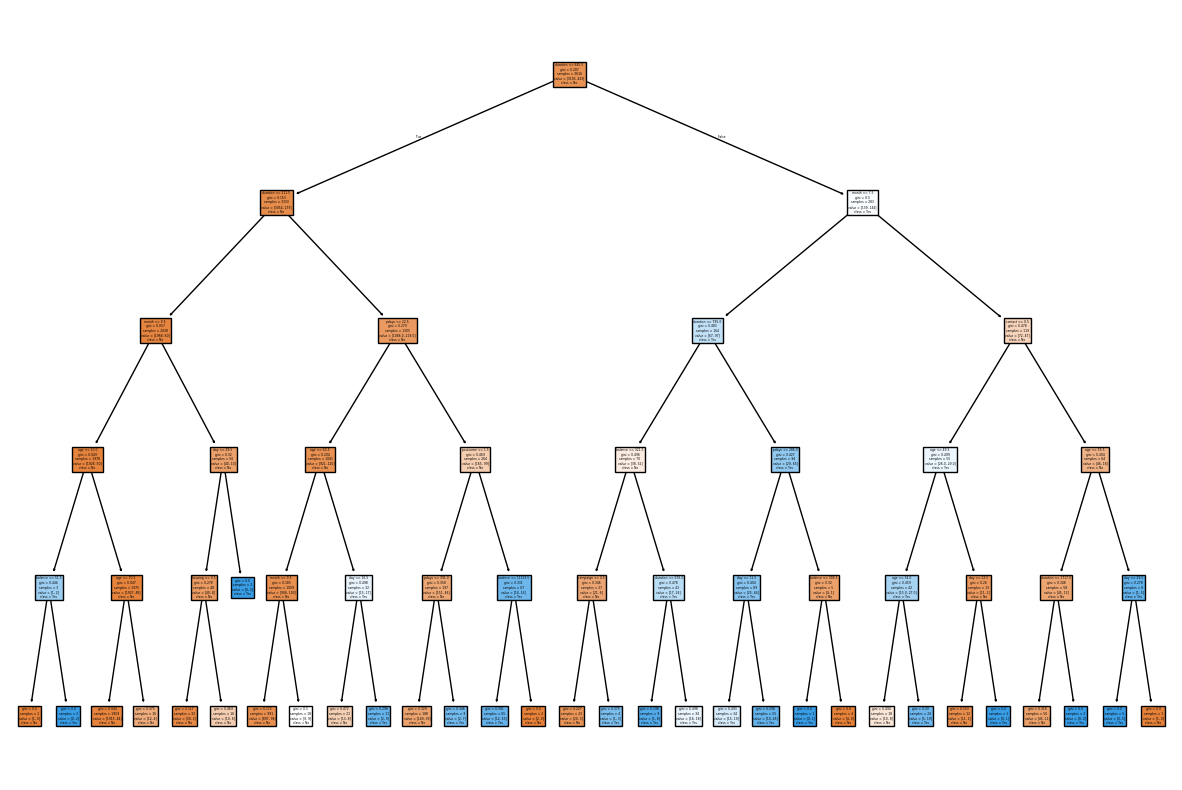

In [10]:
from sklearn.tree import plot_tree
plt.figure(figsize=(15,10))
plot_tree(clf, feature_names=X.columns, class_names=["No", "Yes"], filled=True)
plt.show()

In [11]:
clf_tuned = DecisionTreeClassifier(max_depth=7, min_samples_split=5, min_samples_leaf=3, random_state=42)
clf_tuned.fit(X_train, y_train)
y_pred_tuned = clf_tuned.predict(X_test)
accuracy_tuned = accuracy_score(y_test, y_pred_tuned)
print(f"Tuned Decision Tree Accuracy: {accuracy_tuned:.2f}")


Tuned Decision Tree Accuracy: 0.90
